## Анализ рекламных источников

Задача: проанализировать поведение пользователей в зависимости от источников привлечения. 

## Материалы:
* [Презентация](https://drive.google.com/file/d/11pCJNjSCuiu6GNjR9ddbvdoR0WgN7kkF/view?usp=sharing)
* [Дашборд](https://public.tableau.com/app/profile/viktoria7006/viz/Yandex_Final_16297391614230/Dashboard1?publish=yes)

## Содержание проекта:
* 1 [Часть 1. Загрузка и подготовка данных](#m1)
    * 1.1 [Таблица game_actions](#m1.1)
    * 1.2 [Таблица ad_costs](#m1.2)
    * 1.3 [Таблица user_source](#m1.3)
* 2 [Часть 2. Исследовательский анализ данных (общий, по источникам)](#m2)
    * 2.1 [DAU пользователей](#m2.1)
    * 2.2 [Процент и Retention Rate пользователей по стратегиям и первому уровню](#m2.2)
    * 2.3 [Распределение количества построек по видам](#m2.2)
    * 2.4 [Количество построек на одного пользователя](#m2.4)
    * 2.5 [Время, проведенное в игре](#m2.5)
* 3 [Часть 3. Метрики по источникам](#m3)
    * 3.1 [DAU пользователей](#m3.1)
    * 3.2 [CAC по источнкиам](#m3.2)
    * 3.3 [Retention rate по источникам](#m3.3)
* 4 [Часть 4. Проверка гипотез](#m4)
     * 4.1 [Время завершения уровня не различается от способа прохождения](#m4.1)
     * 4.2 [Количество построек не отличается от стратегии прохождения уровня](#m4.2)
* 5 [Общий вывод и рекомендации](#m5)

## Часть 1. Загрузка и поготовка данных <a name="m1"></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib.ticker as ticker
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [4]:
actions = pd.read_csv('game_actions.txt', sep=',', engine='python')
add = pd.read_csv('ad_costs.csv')
source = pd.read_csv('user_source.csv')

### Таблица game_actions <a name="m1.1"></a>

In [5]:
actions

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


Датасет *game_actions.csv*:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

In [6]:
# проверка на пропуски и тип данных
actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


Типы данные везде те, кроме столбца с datetime. А вот пропуски есть в building_type (это ожидаемо, поскольку некоторые event не подразумевают постройку) и project_type (тоже очевидно, не все выполнили проект). 

In [7]:
# проверка на дубликаты
actions.duplicated().sum()

1

In [8]:
actions

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [9]:
# удаление дублкатов
actions = actions.drop_duplicates().reset_index(drop=True)

In [10]:
display(actions['event'].unique())
display(actions['building_type'].unique())
display(actions['project_type'].unique())

array(['building', 'finished_stage_1', 'project'], dtype=object)

array(['assembly_shop', 'spaceport', nan, 'research_center'], dtype=object)

array([nan, 'satellite_orbital_assembly'], dtype=object)

Проверка на уникальные значения не выявила значения, не относящихся к норме

In [11]:
# перевод в datetime
actions['event_datetime'] = pd.to_datetime(actions['event_datetime'])

In [12]:
# рассмотрим таблицу только с NaN в building_type.
# моя теория в том, что в данной таблице в event должно быть finished_stage_1, а в project_type лишь NaN.
# тогда можно говорить о том, что здесь юзеры, использующие лишь победы над врагами
nan = actions[pd.isnull(actions['building_type'])]
nan

,event_datetime,event,building_type,user_id,project_type
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN
...,...,...,...,...,...
135631,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN
135632,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN
135635,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [13]:
display(nan['project_type'].unique())
display(nan['event'].unique())

array([nan, 'satellite_orbital_assembly'], dtype=object)

array(['finished_stage_1', 'project'], dtype=object)

Видно, что теория не подвердилась. Посмотрим, что там еще скрывается

In [14]:
project_not_nan = nan[nan['project_type'] == 'satellite_orbital_assembly']
project_not_nan['event'].unique()

array(['project'], dtype=object)

In [15]:
project_not_nan

,event_datetime,event,building_type,user_id,project_type
47121,2020-05-08 18:10:25,project,NaN,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly
57398,2020-05-09 13:49:11,project,NaN,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly
58797,2020-05-09 16:19:33,project,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly
61174,2020-05-09 20:29:01,project,NaN,85d9e675-562b-4329-8bbd-14d3b39096be,satellite_orbital_assembly
63770,2020-05-10 00:57:47,project,NaN,1889ca71-3c57-4e61-9ea6-a711971bbf0a,satellite_orbital_assembly
...,...,...,...,...,...
135601,2020-06-02 03:04:42,project,NaN,9d98001c-7e14-40d7-896e-46b3047365fd,satellite_orbital_assembly
135602,2020-06-02 06:21:03,project,NaN,df4a1e13-eba9-4928-a7cf-ee303d6f80f9,satellite_orbital_assembly
135608,2020-06-02 17:17:28,project,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,satellite_orbital_assembly
135616,2020-06-03 09:46:04,project,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,satellite_orbital_assembly


Так, видно, что это просто пользователи, которые перешли на ивент project, да и все. Тут и не должно быть построек, это лишь как факт события, все окей.

Также мной было принято решение удалить project_type столбец. В данном случае у нас лишь один проект, как показали уникальные значения данных. Следовательно тип проекта не имеет смысла.

In [16]:
actions = actions.drop(['project_type'], axis = 1)
actions

,event_datetime,event,building_type,user_id
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d
...,...,...,...,...
135634,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195
135635,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a
135636,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316
135637,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b


### Таблица ad_costs <a name="m1.2"></a>

In [17]:
add

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


Датасет *ad_cost.csv*:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

In [18]:
add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [19]:
add['day'] = pd.to_datetime(add['day'])
add

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [20]:
add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


### Таблица user_source <a name="m1.1"></a>

In [21]:
source

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,instagram_new_adverts
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,facebook_ads
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,yandex_direct
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,instagram_new_adverts


Датасет user_source.csv содержит колонки:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение

In [22]:
# проверка на пропуски и типы данных
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [23]:
# проверка на наличие дубликатов
source.duplicated().sum()

0

In [24]:
# так как источников в таблице add у нас 4, то и сумма уникальнх значений в источников таблицы source должно быть 4
source['source'].nunique()

4

В данной таблице все в норме, можно спокойно с ней работать

## Часть 2. Исследовательский анализ данных <a name="m2"></a>

Проинализируем общие действия игроков, независимо от источника привлечения.

Однако на этом этапе присоединим источники к нашим данным, так как в будущем будем использовать датафреймы, подготовленные на данном этапе. Также разделим перед анализом все по нужным датафреймам, добавим нужные функции для работы с будущем.

In [25]:
actions = actions.merge(source, how='left', on='user_id')
# добавим источник пользователя
actions['activity_day'] = actions['event_datetime'].dt.date
# выделим в отдельный сотлбец день, чтобы в дальнейшем было удобно группировать по дням.

In [26]:
first_event = actions.groupby(['user_id']).agg(first_event_datetime = ('event_datetime', 'min')).reset_index()
actions = actions.merge(first_event, how='left', on='user_id')
actions['first_event_datetime'] = actions['first_event_datetime'].dt.date
#actions['first_event_datetime'] = pd.to_datetime(actions['first_event_datetime'])
# добавляем время первого действия
last_event = actions.groupby(['user_id']).agg(last_event_datetime = ('event_datetime', 'max')).reset_index()
actions = actions.merge(last_event, how='left', on='user_id')
actions['last_event_datetime'] = actions['last_event_datetime'].dt.date
#actions['last_event_datetime'] = pd.to_datetime(actions['last_event_datetime'])
# добавляем время последнего действия

In [27]:
# добавляем lifetime в нашу таблицу
actions['cohort_lifetime'] = actions['activity_day'] - actions['first_event_datetime']
actions['cohort_lifetime'] = actions['cohort_lifetime'] / np.timedelta64(1,'D')
actions['cohort_lifetime'] = actions['cohort_lifetime'].round().astype('int')

In [28]:
time_in_game = actions.groupby('user_id')['cohort_lifetime'].max().reset_index()
time_in_game.columns = ['user_id', 'time_in_game']
actions = actions.merge(time_in_game, on='user_id')
# добавили сколько дней пользователь провел в игре

In [29]:
actions.head()

,event_datetime,event,building_type,user_id,source,activity_day,first_event_datetime,last_event_datetime,cohort_lifetime,time_in_game
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,2020-05-04,2020-05-04,2020-05-10,0,6
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,2020-05-05,2020-05-04,2020-05-10,1,6
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,2020-05-05,2020-05-04,2020-05-10,1,6
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,2020-05-05,2020-05-04,2020-05-10,1,6
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,2020-05-06,2020-05-04,2020-05-10,2,6


In [30]:
users_with_finish = actions[actions['event'] == 'finished_stage_1'].reset_index(drop=True)
users_with_finish = users_with_finish['user_id']
# выделим пользователей, которые окончили уровень, чтобы обрезать данные в будущем

In [31]:
finished = actions.query('user_id in @users_with_finish').reset_index(drop=True)
# пользователи со статусом "первый уровень получен"
not_finished = actions.query('user_id not in @users_with_finish').reset_index(drop=True)
# пользователи со статусом "первый уровень не получен"

In [32]:
users_with_project = finished[finished['event'] == 'project'].reset_index(drop=True)
users_with_project = users_with_project['user_id']
# выделим пользователей, которые окончили уровень через проект, чтобы обрезать данные в будущем

In [33]:
finished_with_project = finished.query('user_id in @users_with_project').reset_index(drop=True)
# пользователи, получившие первый уровень через проект
finished_without_project = finished.query('user_id not in @users_with_project').reset_index(drop=True)
# пользователи, получившие первый уровень через победу над врагами

In [34]:
youtube = actions[actions['source'] == 'youtube_channel_reklama'].reset_index(drop=True)
yandex = actions[actions['source'] == 'yandex_direct'].reset_index(drop=True)
facebook = actions[actions['source'] == 'facebook_ads'].reset_index(drop=True)
instagram = actions[actions['source'] == 'instagram_new_adverts'].reset_index(drop=True)

# обрещали начальный датафрейм на 4 маленьких, чтобы разделить пользователей по источникам.

In [69]:
def cohort_heatmap(df, name):
    cohorts = df.groupby(['first_event_datetime','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index() 
    initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_event_datetime','user_id']]
    initial_users_count.columns = ['first_event_datetime', 'initial_uid']
    cohorts = cohorts.merge(initial_users_count, on='first_event_datetime')
    cohorts['retention'] = cohorts['user_id'] / cohorts['initial_uid'] 
    #cohorts['first_event_datetime'] = cohorts['first_event_datetime'].dt.strftime('%Y-%m-%d')
    # считаем Retention по упрощенной формуле
    retention_pivot = cohorts.pivot_table(index='first_event_datetime',
                                      columns='cohort_lifetime',
                                      values='retention',
                                      aggfunc='sum') 
    # сделали сводную таблицу по retention и вывели ее для наглядности
    sns.set(font_scale=1.03)
    plt.figure(figsize=(25, 6))
    plt.title(f'Cohorts: User Retention: {name}', fontsize=15)
    sns.heatmap(retention_pivot, annot=True, fmt='.1g', linewidths=.5, linecolor='white', cmap= 'viridis'); 
    
# функция для построения heatmap retention rate

### DAU пользователей <a name="m2.1"></a>

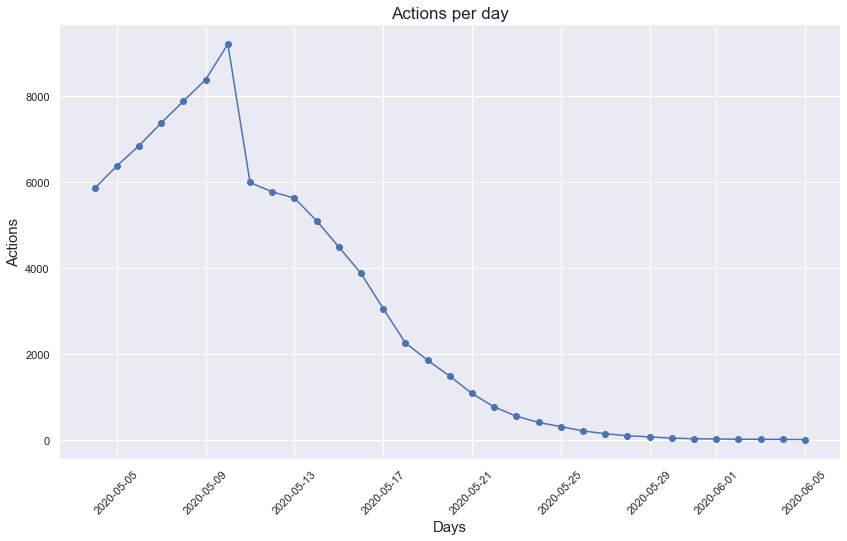

In [36]:
DAU = actions.groupby('activity_day')['user_id'].nunique().reset_index()
plt.figure(figsize=(14,8))
plt.plot(DAU['activity_day'], DAU['user_id'], marker = 'o');
plt.title('Actions per day', fontsize=17);
plt.xlabel('Days', fontsize = 15) 
plt.ylabel('Actions', fontsize = 15) 
plt.xticks(rotation=45);

Первую неделю приходили пользователи. Активность пошла на спад после 21-го мая, кто-то прошел первый уровень, а кто-то просто перестал играть, не увидев результата. То есть после привлечения последнего игрока активность медленно падала в течение 11 дней, а дальше стабилизировалась к минимальным показателям.

### Процент пользователей с разными стратегиями от общего числа <a name="m2.3"></a>

In [37]:
def precent_users(df, df2):
    users = df['user_id'].nunique()
    users_2 = df2['user_id'].nunique()
    precent = users_2 / users
    print('{:.1%}'.format(precent))

In [38]:
print('Закончили первый уровень:')
precent_users(actions, finished)
print('Не закончили первый уровень:')
precent_users(actions, not_finished)

Закончили первый уровень:
42.8%
Не закончили первый уровень:
57.2%


Большинство пользователей не закончили первый уровень.

In [39]:
print('Закончили первый уровень победой:')
precent_users(finished, finished_without_project)
print('Закончили первый уровень проектом:')
precent_users(finished, finished_with_project)

Закончили первый уровень победой:
67.9%
Закончили первый уровень проектом:
32.1%


Из тех пользователей, кто закончил первый уровень, большинство выбрали стратегию победы над врагом. 

 У пользователей с первым уровнем и без него лучше рассмотреть lifetime и наглядно по дням жизни увидеть поведение и Retention Rate

Retention Rate пользователей с первым уровнем и пользователей без первого уровня
 


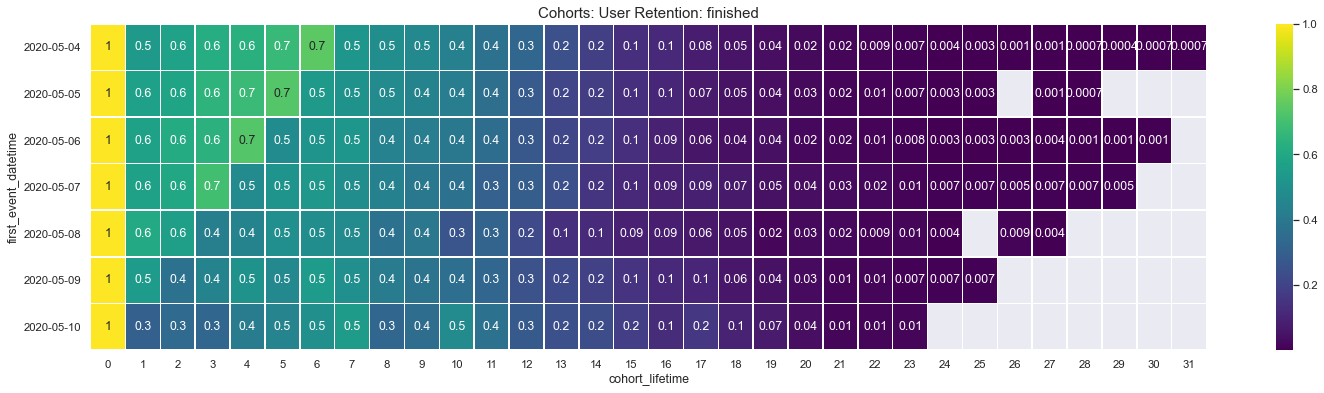

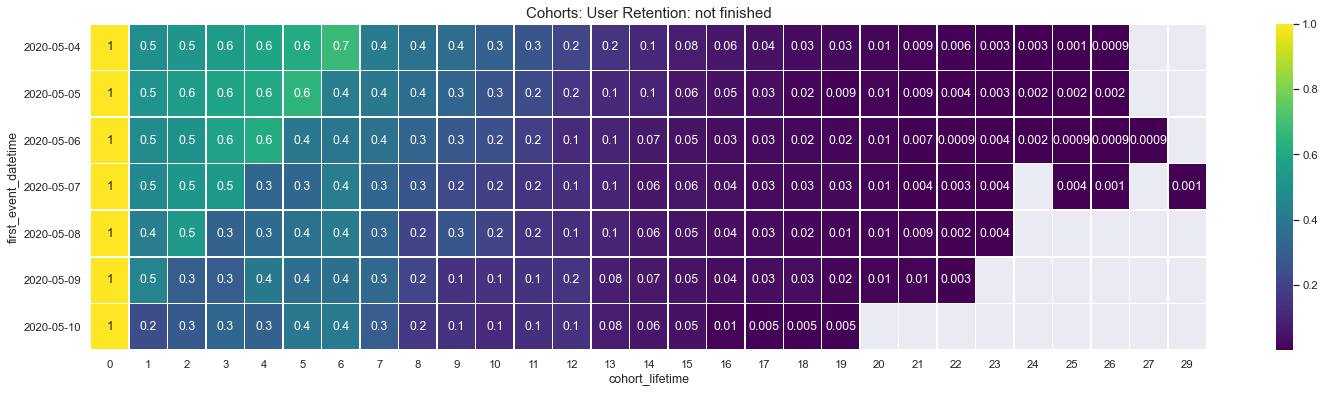

In [70]:
print('Retention Rate пользователей с первым уровнем и пользователей без первого уровня')
print(' ')
cohort_heatmap(finished, 'finished')
cohort_heatmap(not_finished, 'not finished')

Представлено 2 когорты двух разных групп. Первый тепловой график - пользователи, окончившие первый уровень (любым способом), второй график - пользователи, которые не закончили первый уровень.

Первое, что бросается в глаза: вторая руппа имеет lifetime короче первой. Если пользователи, пришедшие 4 мая и завершившие уровень, еще в малои количестве остаются на 31-й день, то пользователи второй группы пропадают на 27-й день бесследно.

Интересно, что и в первой и второй группе есть когорты, которые пропадают на день и возвращаются снова в небольшом количестве на 2-3 дня.

В обоих когортах наблюдается тенденция: чем позже пришел пользователь, тем меньше он заинтересован в игре. Так же когорты "вымирает" на 90% к половине lifetime (если lifetime имеет 30 дней, то на 15-й день остнется 10% от изначальных пользователей.

Также видно, что в принципе теряетяс 50-80% от первоначального количество уже на следующий день, после появления новой когорты. Возможно, что в самой игре нет удержания, но этим заниматься тут не будем, недостаточно данных. Лишь рекомендация.

Основная задача на последующий анализ: узнать источник, в котором когорты более живучие и найти источник, в котором когорты наоборот имеют малый lifetime. Это поможет сделать упор на ту рекламу, которая будет привлекать потенциально заинтересованных пользователей и улучшит общую картину.

### Распределение количества построек по видам <a name="m2.3"></a>

In [41]:
builds = actions.groupby('building_type')['user_id'].count()
builds.sort_values(ascending=False)

building_type
spaceport          59325
assembly_shop      54494
research_center    14137
Name: user_id, dtype: int64

У каждой постройки имеется своя ценность. И не все постройки можно строить сразу. Как видим по данным самые популярные постройки spaceport и assembly_shop, видимо они самая дешевая и самые первые из возможных

In [42]:
builds = actions.pivot_table(index = 'activity_day',
                            columns = 'building_type',
                            values = 'user_id',
                            aggfunc = 'count')

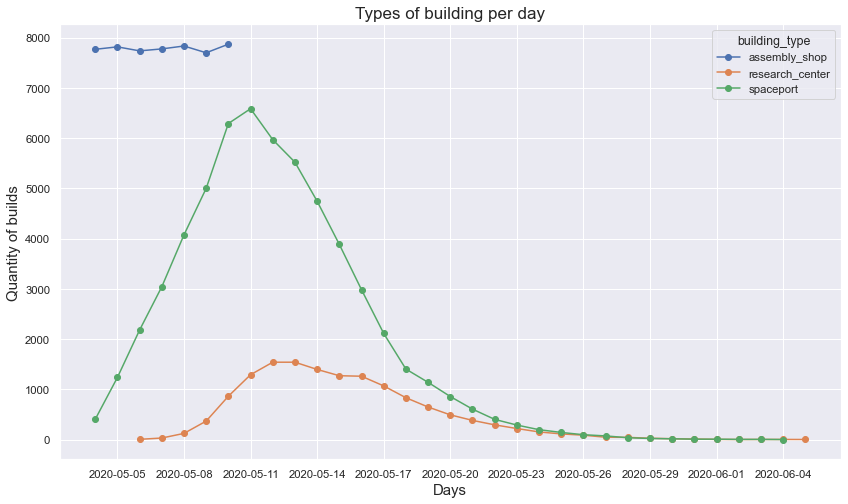

In [43]:
ax = builds.plot(figsize=(14,8), marker='o');
ax.set_title('Types of building per day', fontsize=17);
ax.set_xlabel('Days', fontsize=15);
ax.set_ylabel('Quantity of builds', fontsize=15);
ax.xaxis.set_major_locator(ticker.MultipleLocator(3));
# мультипликатор, чтобы деление было каждые 3 дня
#ax.xticks(rotation=45);

Визуально видно, что assembly_shop можно назвать "начальной" постройкой. И все 9 дней, по которым у нас привлекались новые пользователи, эти постройки строятся в большом количестве. Но, видимо, постройка строится лишь один день, после 10-го мая никаких иных значений нет. Вторая по популяности постройка - это spaceport. Пиковое значение в количестве построек в день набюдается 11 мая, когда уже все пользватели привлечены и строят по максимуму. Редкая постройка - это research_center. Первые постройки произошли спустя 2 дня япосле привлечения первых пользователей. Пиковые значения наблюда.тсяя 12-13 мая, спустя 2-3 дня после привлечения последних новых пользователей. 

После 17 мая все постройки пошли на спад, а с 23 мая количество spaceport и research_center сравнялось.

### Среднее количество построек на одного пользователя <a name="m2.4"></a>

In [66]:
def building(df, name):
    user_build = df.groupby('user_id')['building_type'].count().reset_index()
    user_build.hist(bins=20, figsize=(12,5));
    plt.title(f'Builds per user: {name}', fontsize=17);
    plt.xlabel('Builds', fontsize = 15) 
    plt.ylabel('Users', fontsize = 15);
    # доделать офоорлмение
    print('Среднее количество построек: {:.1f}'.format(user_build['building_type'].sum() / user_build['user_id'].count()))

Среднее количество построек: 9.4


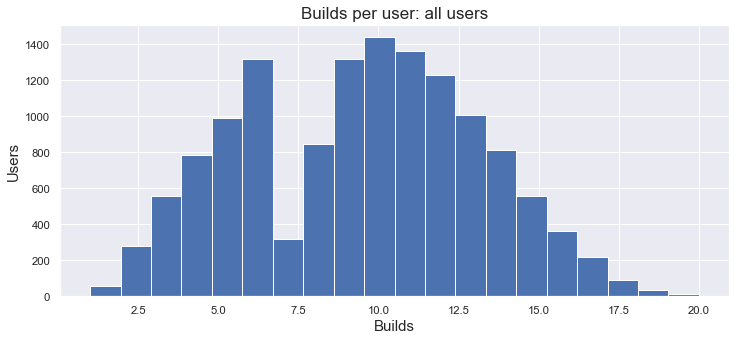

In [67]:
building(actions, 'all users')

На графике наблюдается нормальное наблюдение, но с несколькими отклонениями в районе 7-8 построек. Видимо пользователи либо строят до этого количества и побеждают врага, либо продолжают строить дальше. Либо кто-то еще не достиг первого уровня и пока что остановился на 7-8 поостройках.

В среднем строят 9 построек.

Среднее количество построек: 9.3
Среднее количество построек: 9.5
Среднее количество построек: 9.6
Среднее количество построек: 9.3


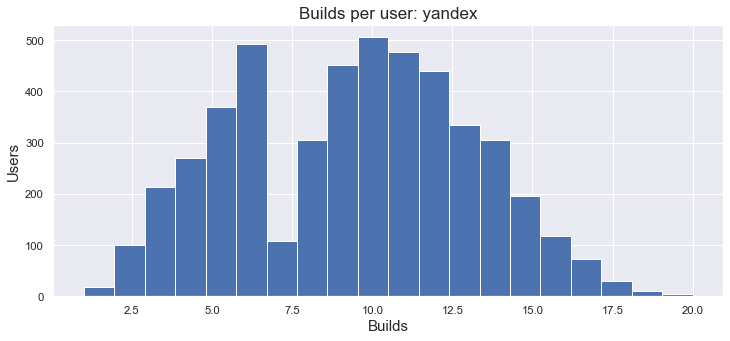

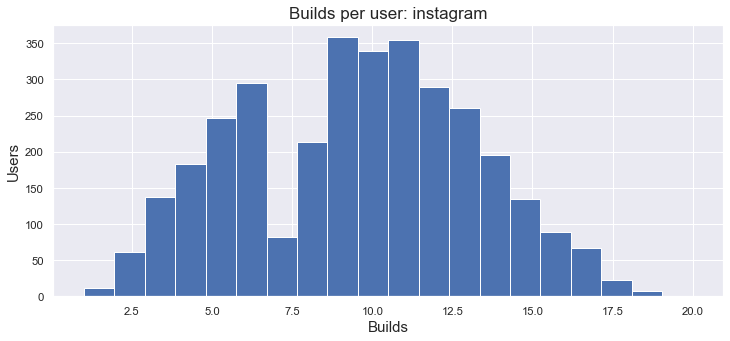

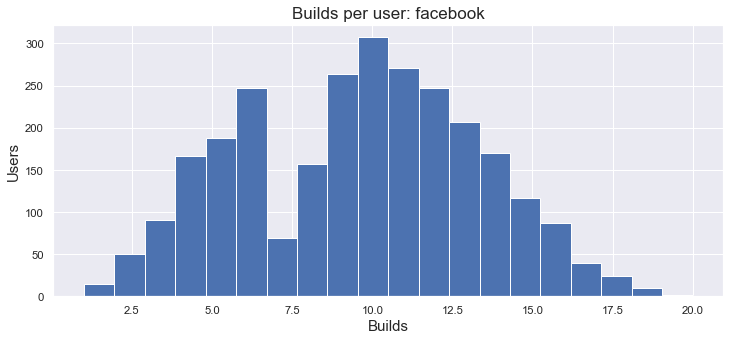

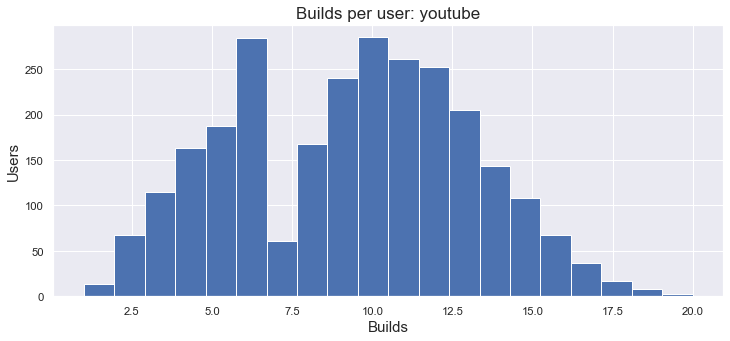

In [68]:
building(yandex, 'yandex')
building(instagram, 'instagram')
building(facebook, 'facebook')
building(youtube, 'youtube')

Графики выставлены все порядке: Yandex, Facebook, Instagram, Youtube.
    
Среднее количество построек на одного пользователя не изменилось: 9. Да и графки даже после деления по рекламным источникам показывают одинаковое поведение, с наименьшими отклонениями. Все также наблюдаются резкие просадки в 7-8 построек.

### Время, проведенное в игре <a name="m2.5"></a>

In [47]:
print('Среднее время в игре пользователей, которые завершили первый уровень:', finished['time_in_game'].median())
print('Среднее время в игре пользователей, которые не завершили первый уровень:', not_finished['time_in_game'].median())

Среднее время в игре пользователей, которые завершили первый уровень: 12.0
Среднее время в игре пользователей, которые не завершили первый уровень: 11.0


Пользователи, которые получили первый уровень, провели в игре на сутки больше. Не хватило усидчивости для получения первого уровня? Непонятно.

In [48]:
print('Среднее время в игре пользователей, которые завершили первый уровень через проект:', finished_with_project['time_in_game'].median())
print('Среднее время в игре пользователей, которые завершили первый уровень через победу над врагом:', finished_without_project['time_in_game'].median())

Среднее время в игре пользователей, которые завершили первый уровень через проект: 13.0
Среднее время в игре пользователей, которые завершили первый уровень через победу над врагом: 11.0


Прохождение уровня через проект занимает на 2 дня больше. Не удивительно, что большинство выбрало стратегию победы над врагом. 

In [63]:
def time_in_game_plot(df, name):
    tig = df.groupby('time_in_game')['user_id'].nunique().reset_index()
    plt.figure(figsize=(12,5))
    plt.plot(tig['time_in_game'], tig['user_id'], marker = 'o');
    plt.title(f'Days in game per user: {name}', fontsize=17);
    plt.xlabel('Days in game', fontsize = 15) 
    plt.ylabel('Users', fontsize = 15) 

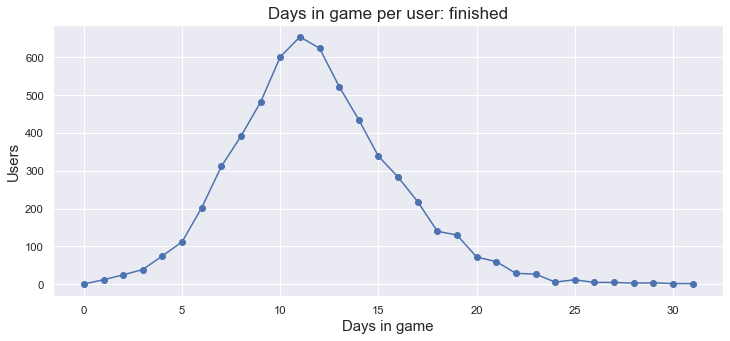

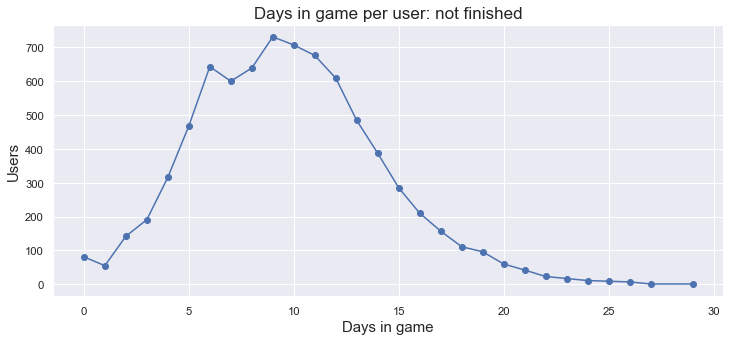

In [64]:
time_in_game_plot(finished, 'finished')
time_in_game_plot(not_finished, 'not finished')

Анализ графиков отдельно:
* Певрый график - график пользователей, которые получили первый уровень. Видно, что до 5 дней в игре провело мало пользователей, дальше график берет рост и пик на 11 дней. Напомню, что медиана 12 дней. Далее график идет на спад и показатели приходят в +\- стабильное опложение после 20 дней. На графике наблюдается нормальное распределение с небольшим смещением в левую сторону.
* Второй график - график пользователей, которые не получили первый уровень. График сильно смещен в левую сторону, что свидетельствует о том, что большинство пользователей проводят меньше времени в игре. График с самого начала берет резкий рост, доходит до пика в 9 дней и идет на спад. Медиана - 11 дней. После 18 дней график =\- нормализуется.

В сравнении этих двух графиков можно сказать, что пользователи, не достигшие первый уровень, изначально не сильно заинтересованы в игре.

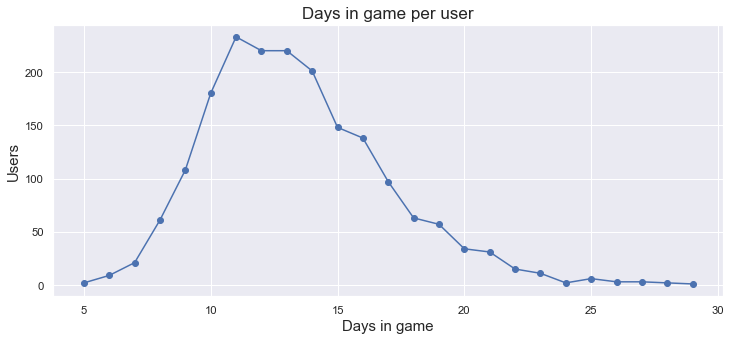

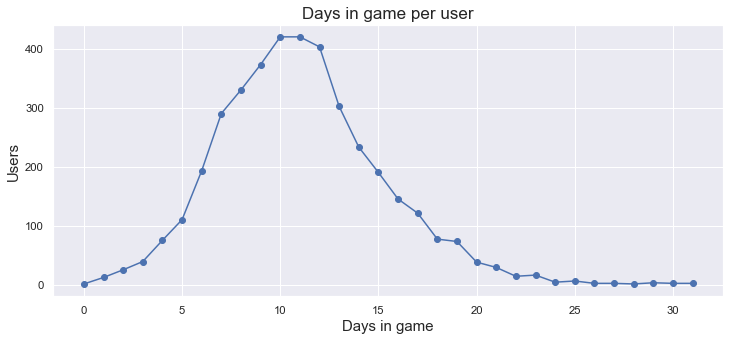

In [51]:
time_in_game_plot(finished_with_project)
time_in_game_plot(finished_without_project)

Оба графики имеют примерно одинаковое смещение в левую сторону. Напомню, что данные представлены тех, кто получил первый уровень. А это значит, что какие-то пользователи получили первый уровень в течение 2-4х дней (активные игроки, видимо). А кто-то получает уровень по 30 дней.

In [57]:
def tig_source_plot(df, name):
    tig = df.pivot_table(index = 'time_in_game',
                           columns = 'source',
                           values = 'user_id',
                           aggfunc = 'nunique')
    ax = tig.plot(figsize=(12,5), marker='o');
    ax.set_title(f'Time in game: {name}', fontsize=17);
    ax.set_xlabel('Days', fontsize=15);
    ax.set_ylabel('Users', fontsize=15);
    ax.xaxis.set_major_locator(ticker.MultipleLocator(3));

# функция для расчета и построения графика со временем, проведенным в игре, в зависимости от источника и типа стратегии

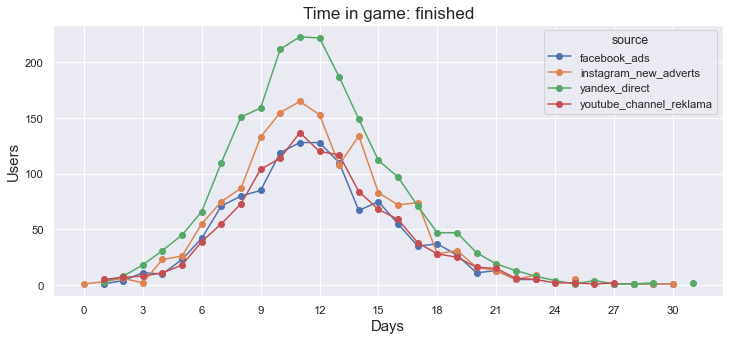

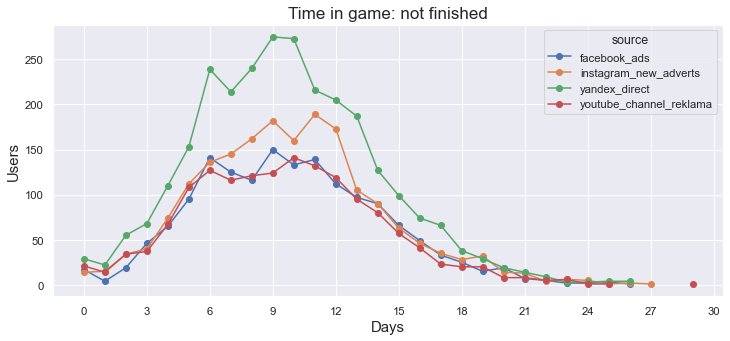

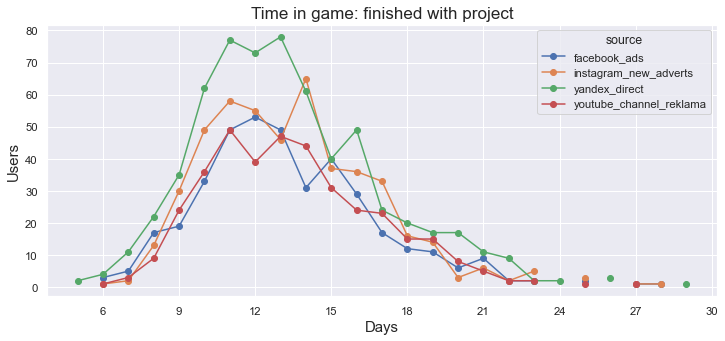

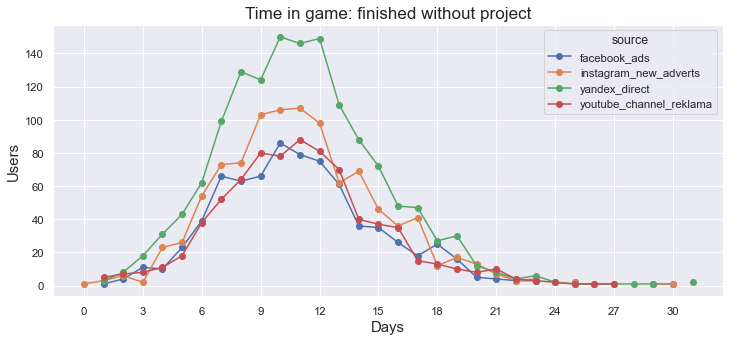

In [61]:
tig_source_plot(finished, 'finished')
tig_source_plot(not_finished, 'not finished')
tig_source_plot(finished_with_project, 'finished with project')
tig_source_plot(finished_without_project, 'finished without project')

* 1 график - время в игре по источникам пользователей, которые достигли первый уровень
* 2 график - время в игре по источникам пользователей, которые не достигли первый уровень
* 3 график - время в игре по источникам пользователей, которые достигли первый уровень с помощью победы
* 4 график - время в игре по источникам пользователей, которые достигли первый уровень с помощью проекта

Графики похожи на те, что у нас получались по общим данным. Это неудивительно. Однако на кадждом графике и каждом источнике имеются свои отличия. Все источники, в заивимости от графика, имеют резкие скачки вниз и вверх. 

In [53]:
print('Среднее время в игре пользователей, пришедших из yandex:', yandex['time_in_game'].median())
print('Среднее время в игре пользователей, пришедших c facebook:', facebook['time_in_game'].median())
print('Среднее время в игре пользователей, пришедших из instagram:', instagram['time_in_game'].median())
print('Среднее время в игре пользователей, пришедших с youtube:', youtube['time_in_game'].median())

Среднее время в игре пользователей, пришедших из yandex: 11.0
Среднее время в игре пользователей, пришедших c facebook: 11.0
Среднее время в игре пользователей, пришедших из instagram: 11.0
Среднее время в игре пользователей, пришедших с youtube: 11.0


Разницы не видно. Неважно какой источник: пользоавател ьв среднем проводит 11 дней.

## Часть 3. Метрики по источникам <a name="m3"></a>

### CAC по источнкиам <a name="m3.1"></a>

In [54]:
count_users = source.groupby('source')['user_id'].count().sort_values(ascending=False).reset_index()
print('Количество пользователей по источникам')
display(count_users)
print(' ')
print('Суммарные рекламные затраты по источникам')
sum_add = add.groupby('source')['cost'].sum().sort_values(ascending=False).reset_index()
display(sum_add)
print(' ')
sum_add['mean_cost'] = (sum_add['cost'] / count_users['user_id'])
print('Средняя стоимость одного пользователя по источникам')
display(sum_add)

Количество пользователей по источникам


,source,user_id
0,yandex_direct,4817
1,instagram_new_adverts,3347
2,facebook_ads,2726
3,youtube_channel_reklama,2686


 
Суммарные рекламные затраты по источникам


,source,cost
0,yandex_direct,2233.111449
1,instagram_new_adverts,2161.441691
2,facebook_ads,2140.904643
3,youtube_channel_reklama,1068.119204


 
Средняя стоимость одного пользователя по источникам


,source,cost,mean_cost
0,yandex_direct,2233.111449,0.463590
1,instagram_new_adverts,2161.441691,0.645785
2,facebook_ads,2140.904643,0.785365
3,youtube_channel_reklama,1068.119204,0.397662


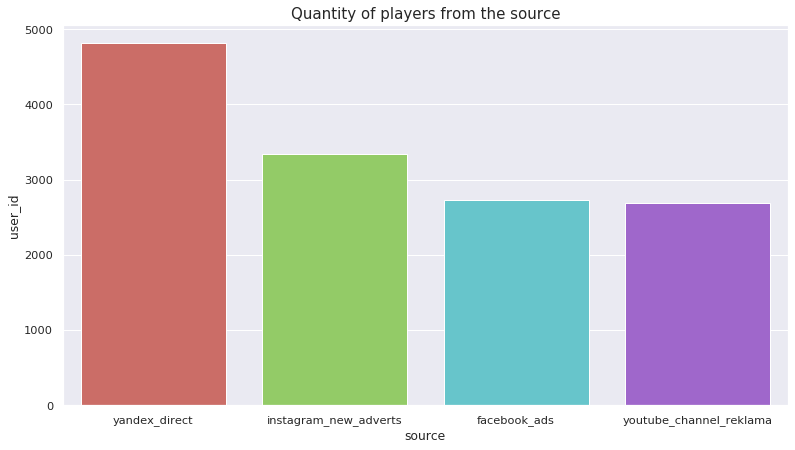

In [55]:
plt.figure(figsize=(13, 7))
plt.title('Quantity of players from the source', fontsize=15)
sns.barplot(x = 'source', y = 'user_id', palette = 'hls', data = count_users);

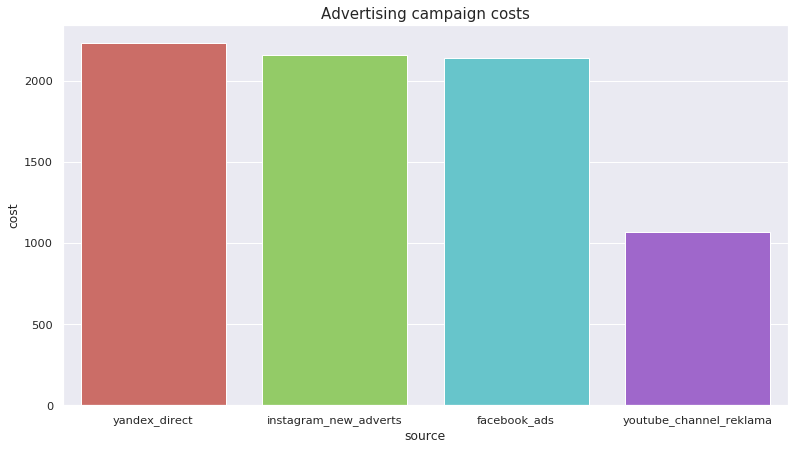

In [56]:
plt.figure(figsize=(13, 7))
plt.title('Advertising campaign costs', fontsize=15)
sns.barplot(x = 'source', y = 'cost', palette = 'hls', data = sum_add);

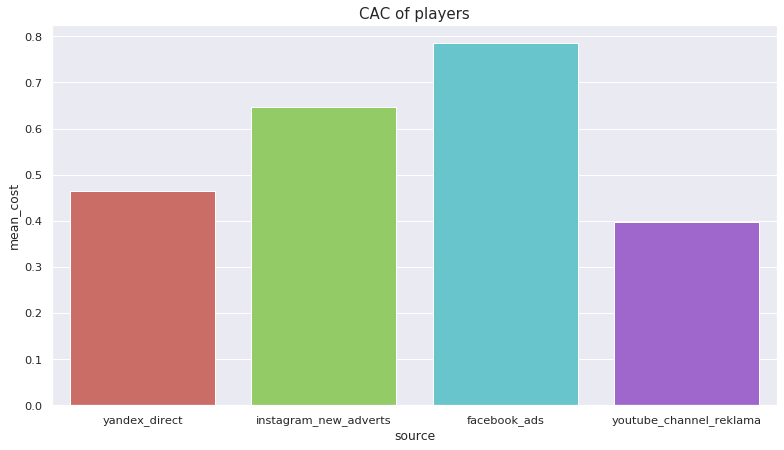

In [57]:
plt.figure(figsize=(13, 7))
plt.title('CAC of players', fontsize=15)
sns.barplot(x = 'source', y = 'mean_cost', palette = 'hls', data = sum_add);

Все показатели, кроме CAC, отсортировали от большего к меньшему.

Видно, что больше приходит с яндекс директа, также это самая затратная за все дни площадка. Но за счет большого количества пользователей стоимость одного не так велика. Меньше всего приходит с фейсбука, но и затраты тоже малы, следовательно средняя стоимость одного пользователя также мала.

Самый дорогой пользователь приходит с фейсбука. По количеству пользователей за все время пришло чуть больше, чем с ютуба. А затраты чуть меньше, чем на яндекс.

Инстаграм второй по дороговизне источник. Пришло пользователей на 1500 человек меньше, чем с яндекса, а завтраты почти одинаковы.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера: </b> 

Супер! CAC рассчитан верно)
</div>

### DAU пользователей <a name="m3.2"></a>

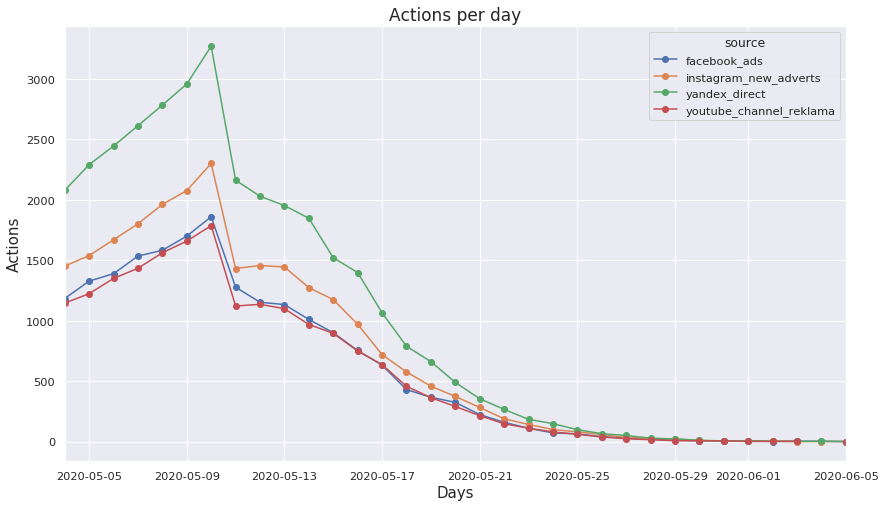

In [58]:
source_dau = actions.pivot_table(index='activity_day',
                             columns='source',
                             values='user_id',
                             aggfunc='nunique')

source_dau.plot(figsize = (14,8), marker = 'o');
plt.title('Actions per day', fontsize=17);
plt.xlabel('Days', fontsize = 15) 
plt.ylabel('Actions', fontsize = 15);

Так как больше пользователей пришло с Яндексе, то и показатели активности видны сильнее. В принципе наблюдается схожая картина, как и на основном графике. Даже после окончания рекламной кампании нет явных изменений в активности пользователей.

### Retention rate по источникам <a name="m3.3"></a>

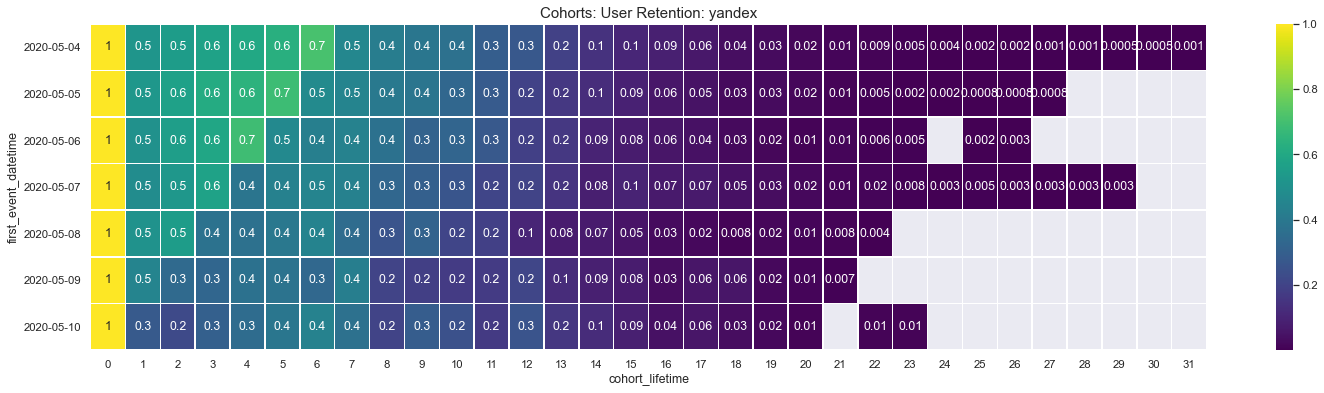

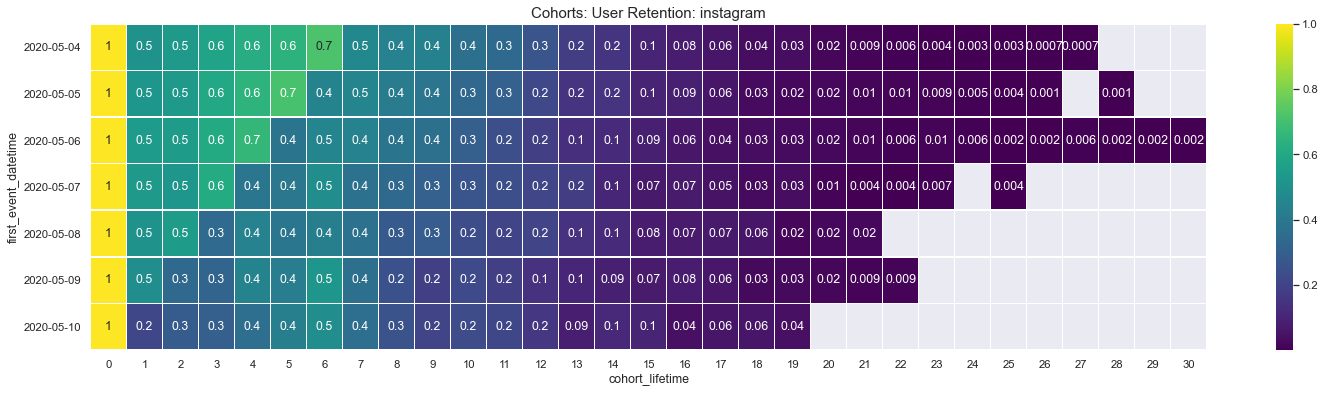

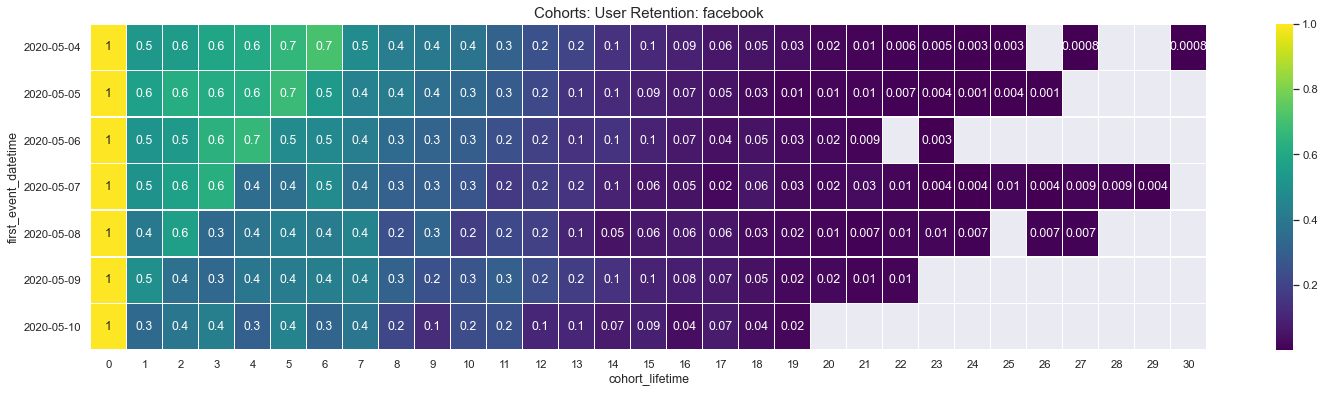

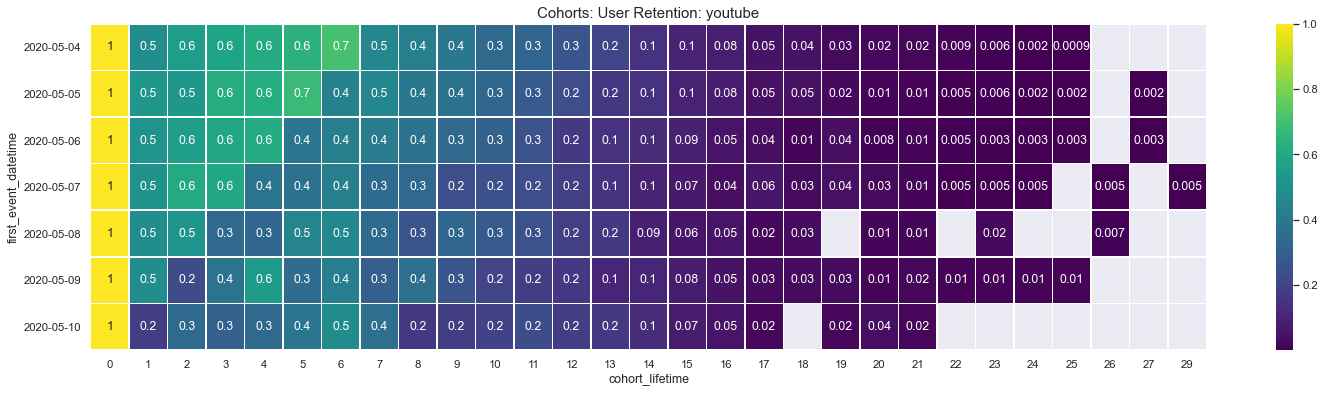

In [73]:
cohort_heatmap(yandex, 'yandex')
cohort_heatmap(instagram, 'instagram')
cohort_heatmap(facebook, 'facebook')
cohort_heatmap(youtube, 'youtube')

Графики выставлены все порядке: Yandex, Facebook, Instagram, Youtube.

Поведение когорт по источникам напоминает общую картину поведения пользователей. Нет такого, что из какого-то источникам пользователи ведут себя иначе. Какие-то источники, конечно, затухают быстрее, какие-то нет. Но на 17-20 дней у каждого источника видно, что пользователи в небольшом количестве вспоминают об игре, заходят и больше не возвращаются. Но чаще это видно у пользователей из источника facebook и youtube. Пользователи из yandex и instagram уходят и не возвращаются.

## Часть 4. Проверка гипотез <a name="m4"></a>

### Время завершения уровня не различается от способа прохождения <a name="m4.1"></a>

In [74]:
finished_with_project['first_event_datetime'] = pd.to_datetime(finished_with_project['first_event_datetime'])
finished_with_project['last_event_datetime'] = pd.to_datetime(finished_with_project['last_event_datetime'])
finished_with_project['time_in_game_hour'] = finished_with_project['last_event_datetime'] - finished_with_project['first_event_datetime']
finished_with_project['time_in_game_hour'] = finished_with_project['time_in_game_hour'] / np.timedelta64(1, 'h')

In [75]:
finished_without_project['first_event_datetime'] = pd.to_datetime(finished_without_project['first_event_datetime'])
finished_without_project['last_event_datetime'] = pd.to_datetime(finished_without_project['last_event_datetime'])
finished_without_project['time_in_game_hour'] = finished_without_project['last_event_datetime'] - finished_without_project['first_event_datetime']
finished_without_project['time_in_game_hour'] = finished_without_project['time_in_game_hour'] / np.timedelta64(1, 'h')

In [76]:
fight = finished_without_project.groupby('time_in_game_hour')['user_id'].nunique()
project = finished_with_project.groupby('time_in_game_hour')['user_id'].nunique()

In [77]:
fight = finished_without_project.groupby('user_id')['time_in_game_hour'].unique()
project = finished_with_project.groupby('user_id')['time_in_game_hour'].unique()

In [78]:
fight

user_id
001d39dc-366c-4021-9604-6a3b9ff01e25    [168.0]
003ee7e8-6356-4286-a715-62f22a18d2a1    [288.0]
004074f8-251a-4776-922c-8348dca1a2f6    [288.0]
00464e5e-28ed-4be6-bf44-517ef7b3937b    [264.0]
0056c007-c082-43cc-bdef-afc49bca4cb9    [144.0]
                                         ...   
ffc6f4fa-3476-47af-85cb-e2ee0551110a    [264.0]
ffd002f3-3545-423e-8dba-0c6a2d48a3aa    [312.0]
ffe810f4-1a1f-464b-924d-6f120b0cb8df    [336.0]
ffef4fed-164c-40e1-bde1-3980f76d0fb5    [168.0]
fffb626c-5ab6-47c9-8113-2062a2f18494    [192.0]
Name: time_in_game_hour, Length: 3951, dtype: object

**Проведем стат.тест.**

H0 - время завершения уровня не различается от способа прохождения (то есть равно)
H1 - время завершения уровня различается от способа прохождения

alpha = 0.05

In [79]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(fight, project, equal_var = False)

print('p-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print("\033[1mОтвергаем нулевую гипотезу\033[0m, следовательно средние \
значения времени прохождения в зависимости от способа завершения различаются")
else:
    print("\033[1mНе получилось отвергнуть нулевую гипотезу\033[0m, следовательно средние \
значения времени прохождения вне зависимости от способа завершения равны")

p-value: [6.57046676e-105]
Отвергаем нулевую гипотезу, следовательно средние значения времени прохождения в зависимости от способа завершения различаются


### Количество построек не отличается от стратегии прохождения уровня <a name="m4.1"></a>

In [80]:
fight = finished_without_project.groupby('user_id')['building_type'].count()
project = finished_with_project.groupby('user_id')['building_type'].count()

In [81]:
project

user_id
006380d6-67a6-45de-ab1e-6eb54ad8dbe8    11
00be7371-fa79-4fbd-b8e7-8ba32e3f8f82    12
00c2b9f2-2615-439c-aed0-6974e4c6c1c1    11
00de2809-403e-4476-a2f7-ca1b11700190    13
00e83261-5fd4-4939-9616-802b5a0202c6    13
                                        ..
ff50f63a-c4b3-494e-8bf9-3f19dbfc513e    18
ff60fcd1-4329-494e-b82d-461fbdf5b5eb    11
ff83bdd8-f49a-49fd-8aad-9fa1fb30d516    13
ff841992-d93b-462e-bc6e-18c24a514f36    20
ffff69cc-fec1-4fd3-9f98-93be1112a6b8    12
Name: building_type, Length: 1866, dtype: int64

Проведем стат.тест.

H0 - количество построек не отличается от стратегии прохождения уровня (равны)
H1 - количество построек различается от стратегии прохождения уровня

alpha = 0.05

In [82]:
alpha = .05
pvalue = st.mannwhitneyu(fight, project)[1]

print('p-value: {}'.format(pvalue))
if pvalue >= alpha: 
    print('Нулевая гипотеза не отвергается: \033[1mсреднее количество построенных объектов одинаково для обоих способов прохождения уровня.\033[0m')
else:
    print('Нулевая гипотеза отвергается: \033[1mсреднее количество построенных объектов различается по способам прохождения уровня.\033[0m')

p-value: 2.605963137511153e-305
Нулевая гипотеза отвергается: среднее количество построенных объектов различается по способам прохождения уровня.


## Часть 5. Общий вывод и рекомендации <a name="m5"></a>

- Закончили первый уровень: 42.8%. Среднее время в игре пользователей, которые завершили первый уровень: 12.0
- Не закончили первый уровень: 57.2%. Среднее время в игре пользователей, которые не завершили первый уровень: 11.0

Значит, что чуть больше половины пользователей бросили игру. Стоит задуматься, ведь, скорее всего, проблема в задержании игрока в игре (но это другая анализ). Разницы в том, сколько проводит человек, который получил первый уровень, а который не получил первый уровень, нет, всего один день в сторону тех, кто получил.

- Закончили первый уровень победой: 67.9%. Среднее время в игре пользователей, которые завершили первый уровень через победу над врагом: 11.0
- Закончили первый уровень проектом: 32.1%. Среднее время в игре пользователей, которые завершили первый уровень через проект: 13.0

Победа над врагом предпочитается большей части игроков, которые получили первый уровень. Видимо из-за того, что данный тип получения уровня быстрее, чем проектная деятельность.

- Среднее количество построек: 9

Были видны просадки в 7-8 построек на игрока, но природа данной просадки неизвестна. Возможно пользователи либо строят мало, либо много.

- От Yandex пришла наибольшая доля игроков — 35% или 4,8 тыс. На втором месте Instagram с 3,3 тыс. На третьем месте Facebook и Youtube по 2,7 тыс. Наименьшие удельные затраты на привлечение игроков у Youtube — 0,4. Это вдвое меньше наиболее дорогого показателя у Facebook — 0,79.

При анализе показателей по источникам выявлено, что существенной разницы в поведении от источника нет. Также среднее время пользователей в игре 11 дней во всех источниках, значит источник прихода не влияет даже на заинтересованность игрока во временных рамках. Также не было разницы в Retention Rate по источникам. Что тоже свидетельствует о том, что независимо от источника игрок проводит примерно одинаковое время.

Гипотеза о том, что время завершения уровня не отличается от стратегии, не подтвердилась при проведении t-test. Также не подтвердилась гипотеза о том, что среднее количество построек одинаково для обоих стратегиях прохождения уровня, используя критерий Манна-Уитни

### Рекомендация

На основа данных рекомендуется расширять рекламу на площадка с наименьшими затратами на одного пользователя, отказавшись от дорогих (на одного пользователя) площадок. Также, хоть это и не относится к моей задаче, стоит задуматься о новых и интересных способах задержания пользователя в игре, поскольку 57% из прибывших не завершают первый уровень, а следовательно не проходят игру дальше. 